## Monte Carlo Options Pricer

This notebook will contain scratch work, thinking process, and everything that pertains to exploring data, ideas and graphs.  
I will first be diving into __Geometric Brownian Motion__ (GBM) and simulating stock prices to get a general idea of how pricing models work and what we are basing them off of (the distributions).  

Let's define GBM:  

$dS_t = \mu S_t dt + \sigma S_t dW_t$
 
where:  

$S_t$: stock price (\$)  
$\mu$: drift, expected return (%)  
$\sigma$: volatility (%)  
$dW_t$: change in Brownian motion $W_{t+dt}-W_t$  

$dW_t$ follows a normal distribution with mean 0 and variance of $dt$ such that $dW_t \sim \mathcal{N}(0, dt)$.  

It is also important to note that we will prediction __European__ options and __American__ options will call later.

#### Solution (European Options)

For **European options**, we only care about the price at the exercise date $T$. We use the explicit closed-form solution to calculate $S_T$ directly from $S_0$:  

$S_T = S_0\exp((\mu - \dfrac{\sigma ^ 2}{2})T + \sigma \sqrt{T}\,Z)$

where $Z \sim \mathcal{N}(0, 1)$.

### Path Simulation (Path-Dependent Options)

If we need to simulate the price path (e.g., for **Asian** or **American** options), we discretize the time into small increments $\Delta t$ and use the recursive formula:

$S_{t+\Delta t} = S_t\exp((\mu - \dfrac{\sigma ^ 2}{2})\Delta t + \sigma \sqrt{\Delta t}\,Z)$

where:  

$S_0$: initial stock price (\$)  
$\mu$: drift (%)  
$\sigma$: volatility  
$t$: time (years)  
$Z$: standard normal random variable

In [28]:
import sys
import os
import pathlib

cwd = pathlib.Path.cwd()
z = os.path.abspath(os.path.join(cwd,'..','src'))
sys.path.append(z)


In [29]:
from src.simulator import StockPriceSimulator
import matplotlib.pyplot as plt
import numpy as np

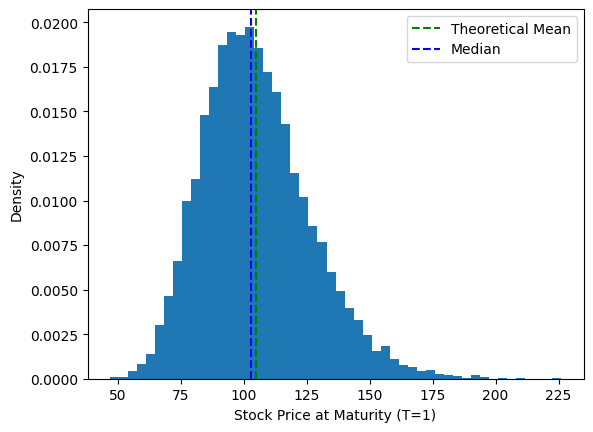

In [43]:
simulator = StockPriceSimulator(s0=100, mu=0.05, sigma=0.2, T=1, n_sims=10000, n_steps=252)
european_paths = simulator.simulate_GBM(option_type='european')

counts, bins = np.histogram(european_paths, bins=50, density=True)
max_count_idx = np.argmax(counts)

plt.hist(european_paths, bins=50, density=True)

plt.ylabel('Density')
plt.xlabel('Stock Price at Maturity (T=1)')
plt.axvline(x=simulator.s0 * np.exp(simulator.mu * simulator.T), color='g', linestyle='--', label='Theoretical Mean')
plt.axvline(x=simulator.s0 * np.exp((simulator.mu - 0.5 * simulator.sigma**2) * simulator.T), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()